In [10]:
# Import tools, read in data from API, and put into Pandas dataframe
import pandas as pd
import json, requests

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [124]:
url = "http://magic-stocks.herokuapp.com/api/v1/metrics/usb"
response = requests.get(url).json()
df = pd.DataFrame(response)

spy_url = "http://magic-stocks.herokuapp.com/api/v1/metrics/spy"
spy_response = requests.get(spy_url).json()
base = pd.DataFrame(spy_response)

In [125]:
del df['adj_close']
del df['direction']
del df['dividend']
del df['high']
del df['id']
del df['low']
del df['open_amt']
del df['rsi']
del df['slowd']
del df['slowk']
del df['sma']
del df['split']
del df['std']
del df['roc']
del df['ticker']
del df['volume']
del df['willr']
del base['adj_close']
del base['direction']
del base['dividend']
del base['high']
del base['id']
del base['low']
del base['open_amt']
del base['rsi']
del base['slowd']
del base['slowk']
del base['sma']
del base['split']
del base['std']
del base['roc']
del base['ticker']
del base['volume']
del base['willr']
del base['next_close']

In [126]:
df = pd.merge(df, base, left_on='date', right_on='date')
df = df.rename(columns={'close_x': 'stock_close', 'close_y': 'spy_close'})
del df['date']

In [127]:
df.head()

,stock_close,next_close,spy_close
0,23.91,23.7700,107.96
1,23.77,24.4300,108.03
2,24.43,24.1400,109.66
3,24.14,24.4000,109.65
4,24.40,23.0425,109.68


In [128]:
X = df[['stock_close', 'spy_close']].to_numpy()
y = df['next_close'].to_numpy()

In [131]:
y = y.reshape(-1, 1)

In [134]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [141]:
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9964437041485305


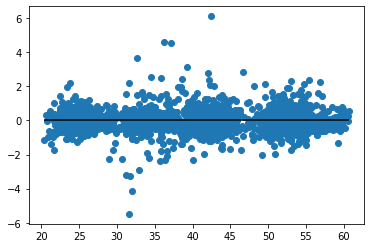

In [142]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [163]:
results = pd.DataFrame({
    "Actual_Next_Close": y[0],
    "Predicted_Next_Close": predictions[0],
    "Error": predictions[0] - y[0]
})

In [164]:
predictions

array([[23.95681494],
       [23.8169428 ],
       [24.47586245],
       ...,
       [35.56458522],
       [35.4940729 ],
       [34.20584682]])

In [165]:
results

,Actual_Next_Close,Predicted_Next_Close,Error
0,23.77,23.956815,0.186815


In [166]:
predictions[0]

array([23.95681494])